In [1]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)
pic_ind = 0

# Лабораторная работа $№4$ 

# «Метод Ньютона»
<font size="4">**Вариант $№6$**</font>

Найти с заданной точностью точку минимума и минимальное значение целевой функции методами:
    
•	классический метод Ньютона;

•	модификация метода Ньютона с исчерпывающим спуском.

Начинать всегда с квадратичной функции (аналитически для нее найти точное решение, с котором сравнивать полученное численное). Далее исследовать функцию Розенброка  $f(x,y)= \alpha (x^2 - y)^2 + (x-1)^2$ различными параметрами $\alpha$. При исследовании для каждой функции брать два параметра точности поиска $\varepsilon = 0.01$ и $\varepsilon = 0.00001$. 
 
   Также для каждой функции и каждого параметра точности поиска взять две различные (существенно различные) начальные точки. Начальные точки выбрать самостоятельно. В методах, в которых необходимо проводить одномерную минимизацию (например в наискорейшем спуске), использовать свой метод золотого сечения, реализованный в лабораторной работе №1.

   В результате исследований должно быть выявлено влияние на стоимость методов (количество вычисленных значений целевой функции)
    
   • параметров точности поиска;
    
   • начальной точки;
    
   • выпуклости (переход от квадратичной функции к функции Розенброка);
    
   • овражности функции (параметра  в функции Розенброка).

# Постановка задачи
1) $f_1(x, y) = 5x^2 + 4xy + 2y^2 + 4\sqrt5 (x+y) + 51$;

   $f_1(x, y) \to min,\phantom{x} (x, y) \in \mathbb{R}^2$.
 
$\phantom{x}$ 
2) $f_2(x, y) = \alpha (x^2 - y)^2 + (x-1)^2$, $\phantom{x}\alpha \in \{1, 20\}$;

   $\phantom{xxi}$ $f_2(x, y) \to min,\phantom{x} (x, y) \in \mathbb{R}^2$.


In [2]:
import numpy as np
def f1(x, y):
    return 5*x*x + 4*x*y + 2*y*y + 4*np.sqrt(5)*(x+y) + 51
def f21(x, y):
    return (x*x - y)**2 + (x-1)**2
def f22(x, y):
    return 20*(x*x - y)**2 + (x-1)**2

In [3]:
eps1 = 0.01
eps2 = 10**(-5)

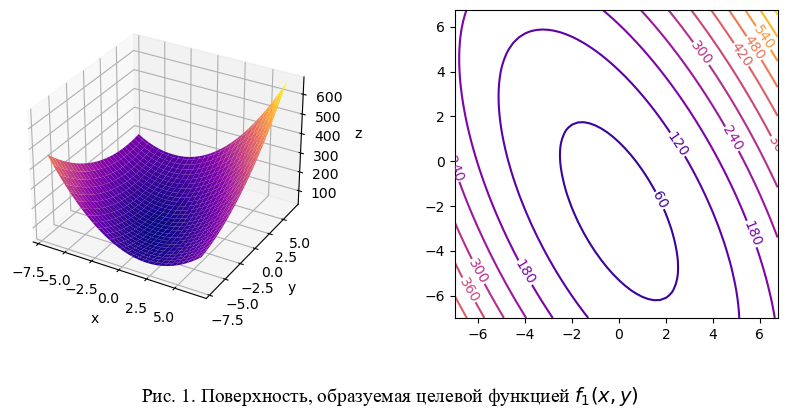

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
F1 = np.vectorize(f1)
Z = F1(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=11, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 1. Поверхность, образуемая целевой функцией $f_1(x,y)$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = -0.2)
plt.show()

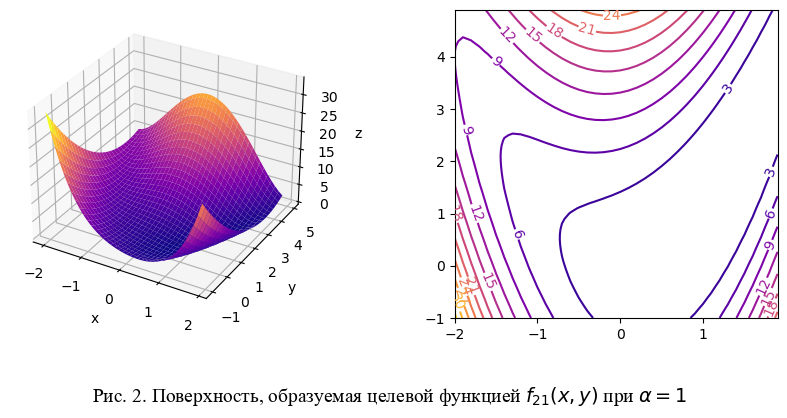

In [5]:
fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F2 = np.vectorize(f21)
Z = F2(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=11, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 2. Поверхность, образуемая целевой функцией $f_{21}(x,y)$ при $α = 1$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = -0.2)
 
plt.show()

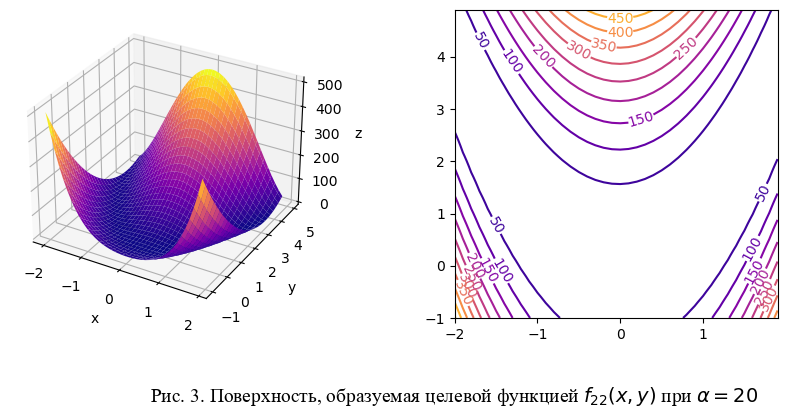

In [6]:
fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F22 = np.vectorize(f22)
Z = F22(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=10, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 3. Поверхность, образуемая целевой функцией $f_{22}(x,y)$ при $α = 20$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = 0)
 
plt.show()

In [7]:
def HesseF1(x, y):
    a = 10
    b = c = d = 4
    return a, b, c, d
def HesseF21(x, y):
    a = 8*x*x + 4*(x*x - y) + 2
    b = c = -4*x
    d = 2
    return a, b, c, d
def HesseF22(x, y):
    a = 160*x*x + 80*(x*x - y) + 2
    b = c = -80*x
    d = 40
    return a, b, c, d

def grad_xf1(x, y):
    return 10*x+4*y+4*np.sqrt(5)
def grad_yf1(x, y):
    return 4*x+4*y+4*np.sqrt(5)

def grad_xf21(x, y):
    return 2*(-1 + x) + 4*x*(x*x - y)
def grad_yf21(x, y):
    return -2*(x*x - y)

def grad_xf22(x, y):
    return 2*(-1 + x) + 80*x*(x*x - y)
def grad_yf22(x, y):
    return -40*(x*x - y)


In [8]:
class System(list):
    def __init__(self, A, f):
        tmpl = [e.copy() for e in A[:]]
        for i in range(len(f)):
            tmpl[i].append(f[i])
        list.__init__(self, tmpl)

    def swap(self, i, j):
        if i != j:
            temp = self[i]
            self[i] = self[j]
            self[j] = temp

    def coef_reduce(self, i, coef):
        for j in range(len(self[i])):
            self[i][j] /= coef

    def str_reduce(self, current, upper):
        coef = self[current][upper]
        for i in range(len(self[upper])):
            self[current][i] -= coef * self[upper][i]

In [9]:
def max_i(Matrix, count, eps):
    max_i = count
    max_ai = abs(Matrix[count][count])
    for i in range(count, len(Matrix)):
        if abs(Matrix[i][count]) > max_ai:
            max_i = i
            max_ai = abs(Matrix[i][count])
    if max_ai <= eps: return None
    return max_i

def GaussElimination(A, f, eps):
    Sys = System(A, f)
    n = len(Sys)
    #прямой ход:
    for i in range(n):
        max_pos = max_i(Sys, i, eps)
        if max_pos != None:
            Sys.swap(i, max_pos)
            Sys.coef_reduce(i, Sys[i][i])
            if i == n: break
            for j in range(i+1, n):
                Sys.str_reduce(j, i)
    solution = [Sys[-1][-1]]
    for i in range(n-2, -1, -1):
        x = Sys[i][-1]
        for j in range(i+1, n):
            x -= Sys[i][j]*solution[n-j-1]
        solution.append(x)
    solution.reverse()
    return solution




In [10]:
#Проверка метода Гаусса:
B = [[-10, -10, 7, -6],
     [-10, -5, 3, -4],
     [7, 3, -7, -3],
     [-6, -4, -3, -2]
     ]
b = [1,
     44,
     -21,
     73
     ]
ans = GaussElimination([[-10, -10, 7, -6],
     [-10, -5, 3, -4],
     [7, 3, -7, -3],
     [-6, -4, -3, -2]
     ], [1,
     44,
     -21,
     73
     ], 1e-2)
print('real ans:', ans)

real ans: [-9.0, -1.0000000000000013, -9.0, 6.000000000000002]


# Метод Ньютона

In [11]:
def NewtonMinSearch(func, x_grad, y_grad, hesse, x0, y0, eps):
    def positive_matrix(a, b, c, d):
        if a > 0 and a*d - b*c > 0:
            return True
        return False
    def E_inc(a, d, coef):
        return a + coef, d + coef
    
    x, y = x0, y0
    
    while True:
        wx, wy = -x_grad(x, y), -y_grad(x, y)
        length = np.sqrt(wx*wx + wy*wy)
        fxx, fxy, fyx, fyy = hesse(x, y)
        positive = positive_matrix(fxx, fxy, fyx, fyy)
        if length <= eps: 
            if positive:
                break
            else: 
                print("Необходимо доп. исследование в окрестности точки")
                break
        
        
        h_fxx, h_fxy, h_fyx, h_fyy = fxx, fxy, fyx, fyy
        if not positive:
            eta = 0.5
            while not positive_matrix(h_fxx, h_fxy, h_fyx, h_yy):
                h_fxx, h_fyy = E_inc(h_fxx, h_fyy, eta)
        #решаем СЛАУ, находим p и точку x = x+p, идём в начало        
        p = GaussElimination([[h_fxx, h_fxy], 
                                    [h_fyx, h_fyy]],
                                  [wx, wy], eps*1e-1)
        
        px, py = p[0], p[1]
        x += px
        y += py
            
    return x, y, func(x, y)

In [12]:
NewtonMinSearch(f1, grad_xf1, grad_yf1, HesseF1, -3, 55, 1e-7)

(7.105427357601002e-15, -2.2360679774997934, 41.0)

In [13]:
def InfoNewtonMinSearch(func, x_grad, y_grad, hesse, x0, y0, eps):
    def positive_matrix(a, b, c, d):
        if a > 0 and a*d - b*c > 0:
            return True
        return False
    def E_inc(a, d, coef):
        return a + coef, d + coef
    
    x, y = x0, y0
    
    xvals = [x]
    yvals = [y]
    
    gradcalls = 0
    hessecalls = 0
    iterations = 0
    
    while True:
        wx, wy = -x_grad(x, y), -y_grad(x, y)
        gradcalls += 1
        length = np.sqrt(wx*wx + wy*wy)
        fxx, fxy, fyx, fyy = hesse(x, y)
        hessecalls += 1
        positive = positive_matrix(fxx, fxy, fyx, fyy)
        if length <= eps: 
            if positive:
                break
            else: 
                print("Необходимо доп. исследование в окрестности точки")
                break
        
        
        h_fxx, h_fxy, h_fyx, h_fyy = fxx, fxy, fyx, fyy
        #print(h_fxx, h_fxy, '\n',h_fyx, h_fyy)
        #print(positive)
        if not positive: #точка, с кот расходится #подтв теорию, что отр опред матриц
            print("ss",h_fxx, h_fxy, h_fyx, h_fyy)
            eta = 1
            while not positive_matrix(h_fxx, h_fxy, h_fyx, h_fyy):
                h_fxx, h_fyy = E_inc(h_fxx, h_fyy, eta)
        #решаем СЛАУ, находим p и точку x = x+p, идём в начало        
        p = GaussElimination([[h_fxx, h_fxy], 
                                    [h_fyx, h_fyy]],
                                  [wx, wy], eps*1e-1)
        
        px, py = p[0], p[1]
        x += px
        y += py
        
        iterations += 1
        if iterations >= 100: break
        xvals.append(x)
        yvals.append(y)
        
        
    return x, y, func(x, y), xvals, yvals, iterations, gradcalls, hessecalls 

In [14]:
InfoNewtonMinSearch(f21, grad_xf21, grad_yf21, HesseF21, 2, 3, eps2)

(1.000002055311861,
 1.0000038461680907,
 4.2942458608744595e-12,
 [2,
  1.6666666666666667,
  1.121212121212122,
  1.0452190296749884,
  1.0005163119163865,
  1.000002055311861],
 [3,
  2.666666666666667,
  0.959595959595962,
  1.0867078700333532,
  0.9990345574357627,
  1.0000038461680907],
 5,
 6,
 6)

In [15]:
def ExperimentPlot(func, xmin1, xmax1, ymin1, ymax1,
                   xmin2, xmax2, ymin2, ymax2, n1, n2,n3, n4,
                   xs1, ys1, xs2, ys2, xs3, ys3, xs4, ys4, 
                    ind, xstart1, ystart1, xstart2, ystart2,
                    xspacing, yspacing, fnum=1, eps1=2, eps2=5, method=''):
    x1 = np.linspace(xmin1, xmax1)
    y1 = np.linspace(ymin1, ymax1)
    X1, Y1 = np.meshgrid(x1, y1)
    Z1 = func(X1, Y1)
    x2 = np.linspace(xmin2, xmax2)
    y2 = np.linspace(ymin2, ymax2)
    X2, Y2 = np.meshgrid(x2, y2)
    Z2 = func(X2, Y2)
    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 10))
    levels1 = []
    levels2 = []
    levels3 = []
    levels4 = []
    
    ax[0][0].scatter(xs1[0:n1], ys1[0:n1], color='red', lw=0.05, zorder=2)
    ax[0][0].scatter(xs1[-1], ys1[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[0][1].scatter(xs2[0:n2], ys2[0:n2], color='red', lw=0.05, zorder=2)
    ax[0][1].scatter(xs2[-1], ys2[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[1][0].scatter(xs3[0:n3], ys3[0:n3], color='red', lw=0.05, zorder=2)
    ax[1][0].scatter(xs3[-1], ys3[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[1][1].scatter(xs4[0:n4], ys4[0:n4], color='red', lw=0.05, zorder=2)
    ax[1][1].scatter(xs4[-1], ys4[-1], color='red', lw=0.05, marker='*', zorder=2)
    #1 plot
    for i in range(0, n1):
        levels1.append(func(xs1[i], ys1[i]))
        ax[0][0].annotate('', xytext=(xs1[i], ys1[i]), xy=(xs1[i+1], ys1[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels1.sort()
    CS1 = ax[0][0].contour(X1, Y1, Z1, cmap=cm.plasma, levels=levels1, zorder=1)
    ax[0][0].clabel(CS1, CS1.levels,inline=True,inline_spacing = 1)
    #2 plot
    for i in range(0,n2):
        levels2.append(func(xs2[i], ys2[i]))
        ax[0][1].annotate('', xytext=(xs2[i], ys2[i]), xy=(xs2[i+1], ys2[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels2.sort()
    CS2 = ax[0][1].contour(X1, Y1, Z1, cmap=cm.plasma, levels=levels2, zorder=1)
    ax[0][1].clabel(CS2, CS2.levels,inline=True,inline_spacing = 1)
    #3 plot
    for i in range(0,n3):
        levels3.append(func(xs3[i], ys3[i]))
        ax[1][0].annotate('', xytext=(xs3[i], ys3[i]), xy=(xs3[i+1], ys3[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels3.sort()
    CS3 = ax[1][0].contour(X2, Y2, Z2, cmap=cm.plasma, levels=levels3, zorder=1)
    ax[1][0].clabel(CS3, CS3.levels,inline=True,inline_spacing = 1)
    #4 plot
    for i in range(0,n4):
        levels4.append(func(xs4[i], ys4[i]))
        ax[1][1].annotate('', xytext=(xs4[i], ys4[i]), xy=(xs4[i+1], ys4[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels4.sort()
    CS4 = ax[1][1].contour(X2, Y2, Z2, cmap=cm.plasma, levels=levels4, zorder=1)
    ax[1][1].clabel(CS4, CS4.levels,inline=True,inline_spacing = 1)
    
    
    ax[0][0].annotate('$p_{min}$', xytext=(xs1[-1]+xspacing, ys1[-1]-yspacing), xy=(xs1[-1], ys1[-1]))
    ax[0][0].annotate('$p_{start}$', xytext=(xs1[0]+xspacing, ys1[0]-yspacing), xy=(xs1[0], ys1[0]))
    ax[0][0].set_xlabel('x \n \n a)')
    
    ax[0][1].annotate('$p_{min}$', xytext=(xs2[-1]+xspacing, ys2[-1]-yspacing), xy=(xs2[-1], ys2[-1]))
    ax[0][1].annotate('$p_{start}$', xytext=(xs2[0]+xspacing, ys2[0]-yspacing), xy=(xs2[0], ys2[0]))
    ax[0][1].set_xlabel('x \n \n б)')
    
    ax[1][0].annotate('$p_{min}$', xytext=(xs3[-1]+xspacing, ys3[-1]-yspacing), xy=(xs3[-1], ys3[-1]))
    ax[1][0].annotate('$p_{start}$', xytext=(xs3[0]+xspacing, ys3[0]-yspacing), xy=(xs3[0], ys3[0]))
    ax[1][0].set_xlabel('x \n \n в)')
    
    ax[1][1].annotate('$p_{min}$', xytext=(xs4[-1]+xspacing, ys4[-1]-yspacing), xy=(xs4[-1], ys4[-1]))
    ax[1][1].annotate('$p_{start}$', xytext=(xs4[0]+xspacing, ys4[0]-yspacing), xy=(xs4[0], ys4[0]))
    ax[1][1].set_xlabel('x \n \n г)')
    
    ax[0][0].set_ylabel('y')
    ax[0][1].set_ylabel('y')
    ax[1][0].set_ylabel('y')
    ax[1][1].set_ylabel('y')
    
    plt.title(f'Рис. {ind}.'+' Траектория поиска точки минимума функции $f_{'+f'{fnum}'+'}(x, y)$ методом Ньютона'+f'{method}'+', \n \
    а) $p_{start}=($'+f'{xstart1}, {ystart1}'+'$),$' + '$ ε=10^{'+f'{-eps1}'+'}$, \
    б) $p_{start}=($'+f'{xstart1}, {ystart1}'+'$),$' + '$ ε=10^{'+f'{-eps2}'+'}$,\n \
    в) $p_{start}=($'+f'{xstart2}, {ystart2}'+'$),$' + '$ ε=10^{'+f'{-eps1}'+'}$,  \
    г) $p_{start}=($'+f'{xstart2}, {ystart2}'+'$),$' + '$ ε=10^{'+f'{-eps2}'+'}$',
                 fontsize=14, fontname='Times New Roman',y=-0.7, x = -0.3)
    plt.tight_layout()
    #plt.subplots_adjust( wspace=0.3)
    plt.show()
    

In [16]:
xmin1_f1, ymin1_f1, fmin1_f1, xs1_f1, ys1_f1, its1_f1, fls1_f1, grs1_f1 = InfoNewtonMinSearch(f1, 
                                                                                              grad_xf1, grad_yf1, HesseF1, 
                                                                                              -4, 2.5, eps1)

In [17]:
xmin2_f1, ymin2_f1, fmin2_f1, xs2_f1, ys2_f1, its2_f1, fls2_f1, grs2_f1 = InfoNewtonMinSearch(f1, 
                                                                                              grad_xf1, grad_yf1, HesseF1, 
                                                                                              -4, 2.5, eps2)

In [18]:
xmin3_f1, ymin3_f1, fmin3_f1, xs3_f1, ys3_f1, its3_f1, fls3_f1, grs3_f1 = InfoNewtonMinSearch(f1, 
                                                                                              grad_xf1, grad_yf1, HesseF1, 
                                                                                              3, -1, eps1)

In [19]:
xmin4_f1, ymin4_f1, fmin4_f1, xs4_f1, ys4_f1, its4_f1, fls4_f1, grs4_f1 = InfoNewtonMinSearch(f1, 
                                                                                              grad_xf1, grad_yf1, HesseF1, 
                                                                                              3, -1, eps2)

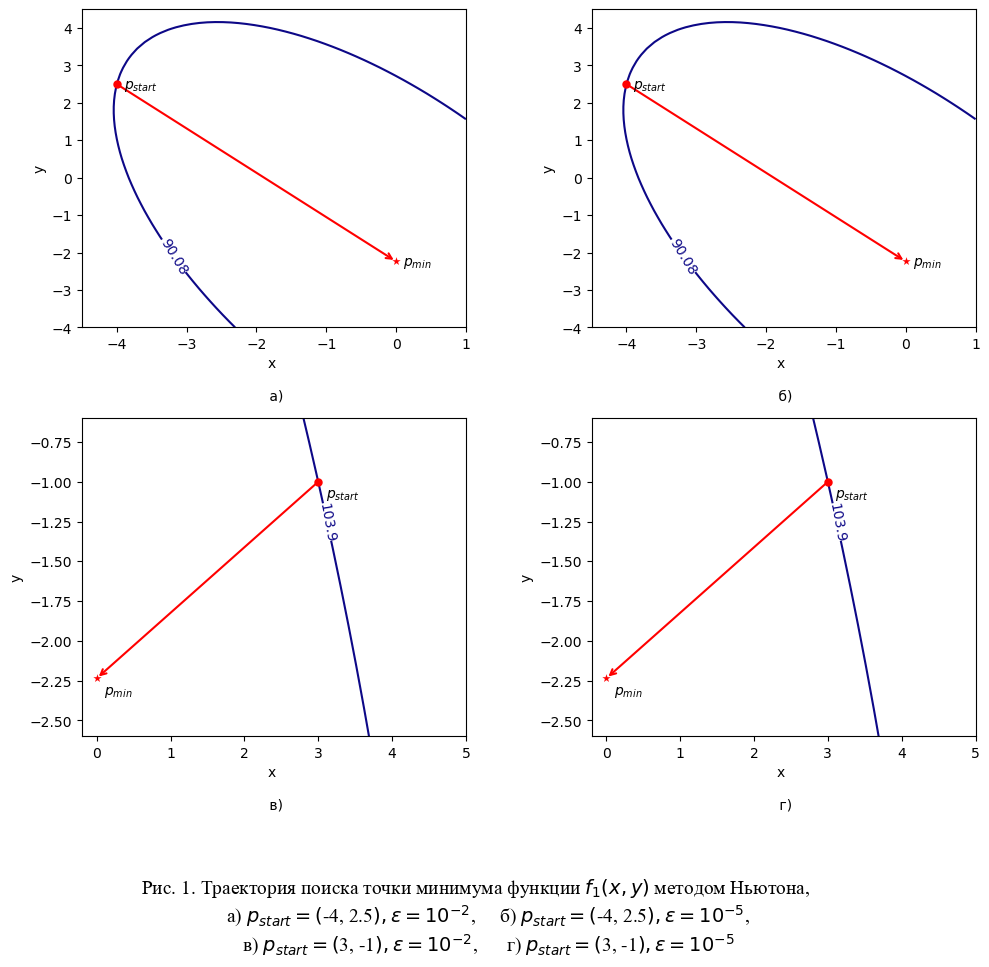

In [20]:
ExperimentPlot(func = f1, xmin1=-4.5, xmax1=1, ymin1=-4, ymax1=4.5,
                   xmin2=-0.2, xmax2=5, ymin2=-2.6, ymax2=-0.6, n1=1, n2=1, n3=1, n4=1,
                   xs1=xs1_f1, ys1=ys1_f1, xs2=xs2_f1, ys2=ys2_f1, 
                   xs3=xs3_f1, ys3=ys3_f1, xs4=xs4_f1, ys4=ys4_f1, 
                    ind = 1, xstart1=-4, ystart1=2.5, xstart2=3, ystart2=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 1, eps1 = 2, eps2 = 5)


In [21]:
xmin1_f21, ymin1_f21, fmin1_f21, xs1_f21, ys1_f21, its1_f21, fls1_f21, grs1_f21 = InfoNewtonMinSearch(f21, 
                                                                                              grad_xf21, grad_yf21, HesseF21, 
                                                                                              -5, 2, eps1)

In [22]:
xmin2_f21, ymin2_f21, fmin2_f21, xs2_f21, ys2_f21, its2_f21, fls2_f21, grs2_f21 = InfoNewtonMinSearch(f21, 
                                                                                              grad_xf21, grad_yf21, HesseF21, 
                                                                                              -5, 2, eps2)

In [23]:
xmin3_f21, ymin3_f21, fmin3_f21, xs3_f21, ys3_f21, its3_f21, fls3_f21, grs3_f21 = InfoNewtonMinSearch(f21, 
                                                                                              grad_xf21, grad_yf21, HesseF21, 
                                                                                              10, 10, eps1)

In [24]:
xmin4_f21, ymin4_f21, fmin4_f21, xs4_f21, ys4_f21, its4_f21, fls4_f21, grs4_f21 = InfoNewtonMinSearch(f21, 
                                                                                              grad_xf21, grad_yf21, HesseF21, 
                                                                                              10, 10, eps2)

In [25]:
print(xs1_f21)
print(ys1_f21)

[-5, -4.872340425531915, 0.8146389694701801, 0.8174610041855555, 0.9999970926090156, 0.9999998183591532]
[2, 23.72340425531915, -31.67809798859896, 0.6682345294841205, 0.9666747616495468, 0.9999996367109096]


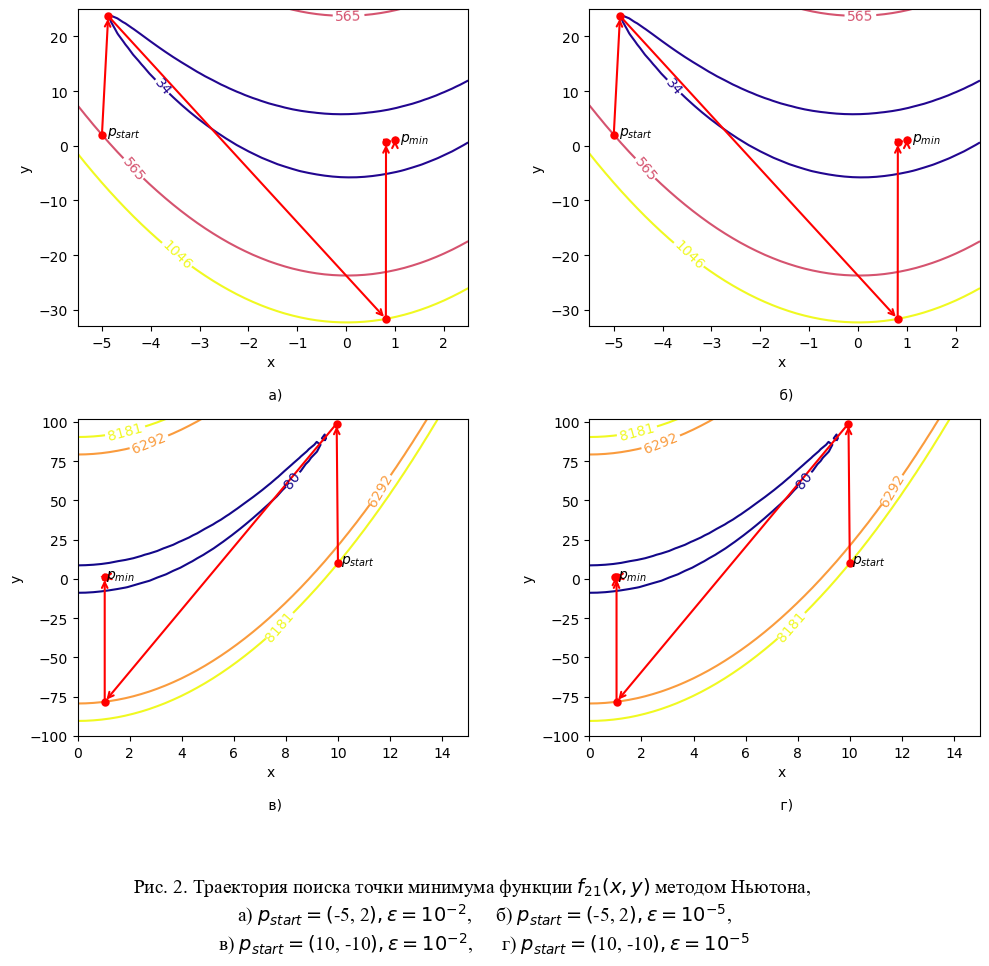

In [26]:
ExperimentPlot(func = f21, xmin1=-5.5, xmax1=2.5, ymin1=-33, ymax1=25,
                   xmin2=0, xmax2=15, ymin2=-100, ymax2=102, n1=its1_f21, n2=its2_f21, n3=its3_f21, n4=its4_f21,
                   xs1=xs1_f21, ys1=ys1_f21, xs2=xs2_f21, ys2=ys2_f21, 
                   xs3=xs3_f21, ys3=ys3_f21, xs4=xs4_f21, ys4=ys4_f21, 
                    ind = 2, xstart1=-5, ystart1=2, xstart2=10, ystart2=-10,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps1 = 2, eps2 = 5)


In [27]:
xmin1_f22, ymin1_f22, fmin1_f22, xs1_f22, ys1_f22, its1_f22, fls1_f22, grs1_f22 = InfoNewtonMinSearch(f22, 
                                                                                              grad_xf22, grad_yf22, HesseF22, 
                                                                                              -5, 2, eps1)

In [28]:
xmin2_f22, ymin2_f22, fmin2_f22, xs2_f22, ys2_f22, its2_f22, fls2_f22, grs2_f22 = InfoNewtonMinSearch(f22, 
                                                                                              grad_xf22, grad_yf22, HesseF22, 
                                                                                              -5, 2, eps2)

In [29]:
xmin3_f22, ymin3_f22, fmin3_f22, xs3_f22, ys3_f22, its3_f22, fls3_f22, grs3_f22 = InfoNewtonMinSearch(f22, 
                                                                                              grad_xf22, grad_yf22, HesseF22, 
                                                                                              10, 10, eps1)

In [30]:
xmin4_f22, ymin4_f22, fmin4_f22, xs4_f22, ys4_f22, its4_f22, fls4_f22, grs4_f22 = InfoNewtonMinSearch(f22, 
                                                                                              grad_xf22, grad_yf22, HesseF22, 
                                                                                              10, 10, eps2)

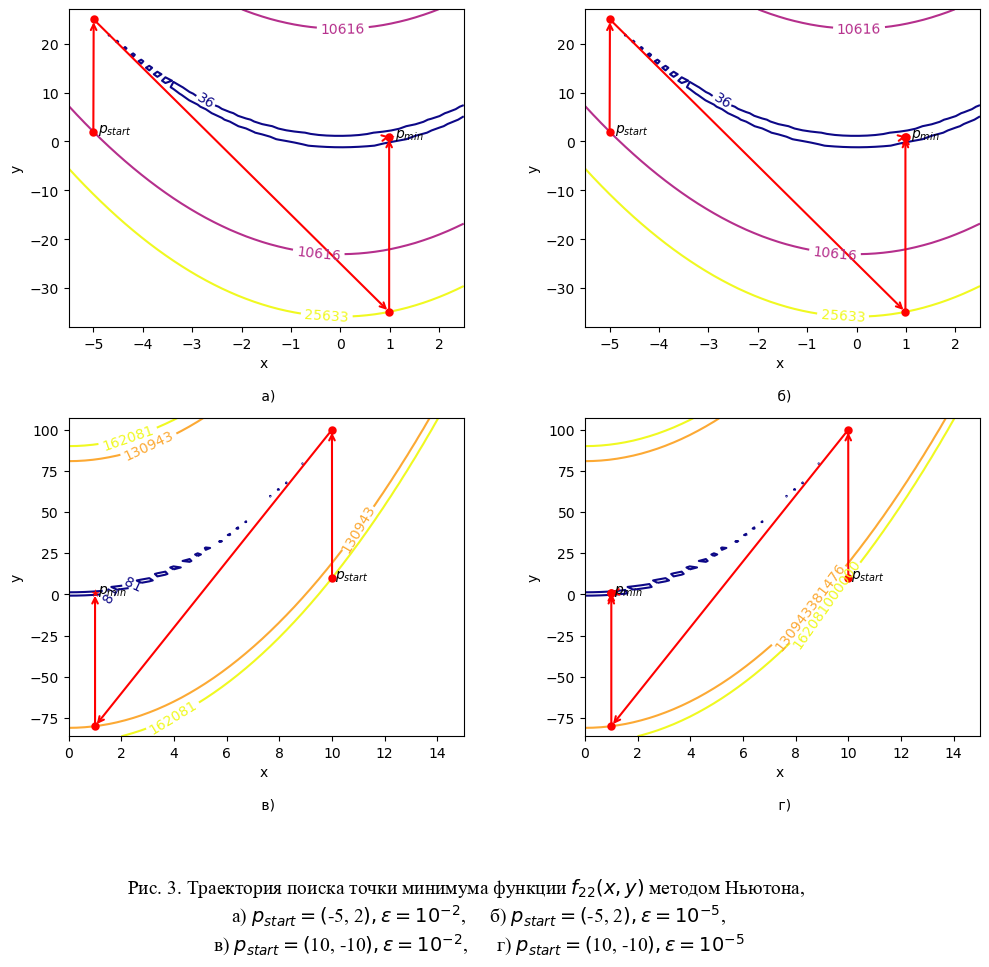

In [31]:
ExperimentPlot(func = f22, xmin1=-5.5, xmax1=2.5, ymin1=-38, ymax1=27,
                   xmin2=0, xmax2=15, ymin2=-86, ymax2=107, n1=its1_f22, n2=its2_f22, n3=its3_f22, n4=its4_f22,
                   xs1=xs1_f22, ys1=ys1_f22, xs2=xs2_f22, ys2=ys2_f22, 
                   xs3=xs3_f22, ys3=ys3_f22, xs4=xs4_f22, ys4=ys4_f22, 
                    ind = 3, xstart1=-5, ystart1=2, xstart2=10, ystart2=-10,
                    xspacing=0.1, yspacing=0.1, fnum = 22, eps1 = 2, eps2 = 5)


In [32]:
import pandas as pd
from IPython.display import HTML

#      # точность / нач точка / кол-во итераций / кол-во вычисленных значений / точка минимума / мин знач / 
# f1
# f21
# # f22
# xmins2.append(xmin1_f22)
# ymins2.append(ymin1_f22)
# fmins2.append(fmin1_f22)
# its2.append(its1_f22)
# fls2.append(fls1_f22)
# grs2.append(grs1_f22)
its1 = [its1_f1, its2_f1, its3_f1, its4_f1, its1_f21, its2_f21, its3_f21, its4_f21, its1_f22, its2_f22, its3_f22, its4_f22]
fls1 = [fls1_f1, fls2_f1, fls3_f1, fls4_f1, fls1_f21, fls2_f21, fls3_f21, fls4_f21, fls1_f22, fls2_f22, fls3_f22, fls4_f22]
grs1 = [grs1_f1, grs2_f1, grs3_f1, grs4_f1, grs1_f21, grs2_f21, grs3_f21, grs4_f21, grs1_f22, grs2_f22, grs3_f22, grs4_f22]
xmins1 = [xmin1_f1, xmin2_f1, xmin3_f1, xmin4_f1, 
          xmin1_f21, xmin2_f21, xmin3_f21, xmin4_f21, 
          xmin1_f22, xmin2_f22, xmin3_f22, xmin4_f22]
ymins1 = [ymin1_f1, ymin2_f1, ymin3_f1, ymin4_f1, 
          ymin1_f21, ymin2_f21, ymin3_f21, ymin4_f21, 
          ymin1_f22, ymin2_f22, ymin3_f22, ymin4_f22]
fmins1 = [fmin1_f1, fmin2_f1, fmin3_f1, fmin4_f1, 
          fmin1_f21, fmin2_f21, fmin3_f21, fmin4_f21, 
          fmin1_f22, fmin2_f22, fmin3_f22, fmin4_f22]
funcs = ['f1(x, y)','f1(x, y)','f1(x, y)','f1(x, y)',
         'f21(x, y)', 'f21(x, y)','f21(x, y)', 'f21(x, y)',
         'f22(x, y)','f22(x, y)', 'f22(x, y)','f22(x, y)']
prec = [format(el, '0.1e') for el in [eps1, eps2]]
df1 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1],prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', '(-5, 2)', '(-5, 2)', 
                                        '(10, 10)', '(10, 10)', '(-5, 2)', '(-5, 2)', '(10, 10)', '(10, 10)'],
                    "Кол-во итераций": [elem for elem in its1], 
                    "Кол-во вычисленных градиентов": [elem for elem in grs1],
                    "Кол-во вычисленных матриц Гессе": [elem for elem in fls1],
                    "Точка минимума": [f'({xmins1[0]: 0.2f}, {ymins1[0]: 0.2f})',
                                     f'({xmins1[1]: 0.5f}, {ymins1[1]: 0.5f})',
                                     f'({xmins1[2]: 0.2f}, {ymins1[2]: 0.2f})',
                                     f'({xmins1[3]: 0.5f}, {ymins1[3]: 0.5f})',
                                     f'({xmins1[4]: 0.2f}, {ymins1[4]: 0.2f})',
                                     f'({xmins1[5]: 0.5f}, {ymins1[5]: 0.5f})',
                                     f'({xmins1[6]: 0.2f}, {ymins1[6]: 0.2f})',
                                     f'({xmins1[7]: 0.5f}, {ymins1[7]: 0.5f})',
                                     f'({xmins1[8]: 0.2f}, {ymins1[8]: 0.2f})',
                                     f'({xmins1[9]: 0.5f}, {ymins1[9]: 0.5f})',
                                     f'({xmins1[10]: 0.2f}, {ymins1[10]: 0.2f})',
                                     f'({xmins1[11]: 0.5f}, {ymins1[11]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins1[0]: 0.2f}',
                                                f'{fmins1[1]: 0.5f}',
                                                f'{fmins1[2]: 0.2f}',
                                                f'{fmins1[3]: 0.5f}',
                                                f'{fmins1[4]: 0.2f}',
                                                f'{fmins1[5]: 0.5f}',
                                                f'{fmins1[6]: 0.2f}',
                                                f'{fmins1[7]: 0.5f}',
                                                f'{fmins1[8]: 0.2f}',
                                                f'{fmins1[9]: 0.5f}',
                                                f'{fmins1[10]: 0.2f}',
                                                f'{fmins1[11]: 0.5f}']
                   })
s = df1.style.hide(axis="index").set_caption("Табл. 1. Результаты поиска минимумов функций методом Ньютона")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s.set_table_styles([cell_hover, headers])
s.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",1,2,2,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",1,2,2,"( 0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",1,2,2,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",1,2,2,"( 0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-5, 2)",5,6,6,"( 1.00, 1.00)",0.00
"f21(x, y)",1.0e-05,"(-5, 2)",5,6,6,"( 1.00000, 1.00000)",0.00000
"f21(x, y)",1.0e-02,"(10, 10)",4,5,5,"( 1.00, 1.00)",0.00
"f21(x, y)",1.0e-05,"(10, 10)",5,6,6,"( 1.00000, 1.00000)",0.00000
"f22(x, y)",1.0e-02,"(-5, 2)",4,5,5,"( 1.00, 1.00)",0.00
"f22(x, y)",1.0e-05,"(-5, 2)",5,6,6,"( 1.00000, 1.00000)",0.00000


# Модифицированный метод Ньютона с наискорейшим спуском

In [33]:
def GoldenRatioMinSearch(func, a, b, eps):
    tau = (1 + np.sqrt(5))/2
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    while length >= eps:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
        length = b - a
    return (a+b)/2
def ModifiedNewtonMinSearch(func, x_grad, y_grad, hesse, x0, y0, eps):
    def positive_matrix(a, b, c, d):
        if a > 0 and a*d - b*c > 0:
            return True
        return False
    def E_inc(a, d, coef):
        return a + coef, d + coef
    
    x, y = x0, y0
    
    while True:
        wx, wy = -x_grad(x, y), -y_grad(x, y)
        length = np.sqrt(wx*wx + wy*wy)
        fxx, fxy, fyx, fyy = hesse(x, y)
        positive = positive_matrix(fxx, fxy, fyx, fyy)
        if length <= eps: 
            if positive:
                break
            else: 
                print("Необходимо доп. исследование в окрестности точки")
                break
        
        
        h_fxx, h_fxy, h_fyx, h_fyy = fxx, fxy, fyx, fyy
        if not positive:
            eta = 0.5
            while not positive_matrix(h_fxx, h_fxy, h_fyx, h_yy):
                h_fxx, h_fyy = E_inc(h_fxx, h_fyy, eta)
        #решаем СЛАУ, находим p и точку x = x+p, идём в начало        
        p = GaussElimination([[h_fxx, h_fxy], 
                                    [h_fyx, h_fyy]],
                                  [wx, wy], eps*1e-1)
        
        px, py = p[0], p[1]
        
        psi = lambda hi: func(x + hi*px, y + hi*py)
        hi = GoldenRatioMinSearch(psi, 0, 10, eps*1e-1)
        x += hi*px
        y += hi*py
            
    return x, y, func(x, y)

In [34]:
ModifiedNewtonMinSearch(f1, grad_xf1, grad_yf1, HesseF1, -3, 55, 1e-7)

(-2.1575005621736558e-10, -2.2360679733835656, 41.0)

In [35]:
def InfoGoldenRatioMinSearch(func, a, b, eps):
    fcalls = 0
    tau = (1 + np.sqrt(5))/2
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    fcalls += 2
    while length >= eps:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
            fcalls += 1
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
            fcalls += 1
        length = b - a
    res = (a+b)/2
    return res, fcalls
def InfoModifiedNewtonMinSearch(func, x_grad, y_grad, hesse, x0, y0, eps):
    def positive_matrix(a, b, c, d):
        if a > 0 and a*d - b*c > 0:
            return True
        return False
    def E_inc(a, d, coef):
        return a + coef, d + coef
    
    x, y = x0, y0
    
    xvals = [x]
    yvals = [y]
    
    gradcalls = 0
    hessecalls = 0
    iterations = 0
    
    while True:
        wx, wy = -x_grad(x, y), -y_grad(x, y)
        gradcalls += 1
        length = np.sqrt(wx*wx + wy*wy)
        fxx, fxy, fyx, fyy = hesse(x, y)
        hessecalls += 1
        positive = positive_matrix(fxx, fxy, fyx, fyy)
        if length <= eps: 
            if positive:
                break
            else: 
                print("Необходимо доп. исследование в окрестности точки")
                break
        
        
        h_fxx, h_fxy, h_fyx, h_fyy = fxx, fxy, fyx, fyy
        
        if not positive:
            eta = 1
            while not positive_matrix(h_fxx, h_fxy, h_fyx, h_fyy):
                h_fxx, h_fyy = E_inc(h_fxx, h_fyy, eta)
        #решаем СЛАУ, находим p и точку x = x+p, идём в начало        
        p = GaussElimination([[h_fxx, h_fxy], 
                                    [h_fyx, h_fyy]],
                                  [wx, wy], eps*1e-1)
        
        px, py = p[0], p[1]
        
        psi = lambda hi: func(x + hi*px, y + hi*py)
        hi, temp_fcalls = InfoGoldenRatioMinSearch(psi, 0, 10, eps*1e-1)
        
        x += hi*px
        y += hi*py
        
        iterations += 1
        if iterations >= 100: break
        xvals.append(x)
        yvals.append(y)
        
        
    return x, y, func(x, y), xvals, yvals, iterations, gradcalls, hessecalls 

In [36]:
xmin1m_f1, ymin1m_f1, fmin1m_f1, xs1m_f1, ys1m_f1, its1m_f1, fls1m_f1, grs1m_f1 = InfoModifiedNewtonMinSearch(f1, 
                                                                                              grad_xf1, grad_yf1, HesseF1, 
                                                                                              -4, 2.5, eps1)

In [37]:
xmin2m_f1, ymin2m_f1, fmin2m_f1, xs2m_f1, ys2m_f1, its2m_f1, fls2m_f1, grs2m_f1 = InfoModifiedNewtonMinSearch(f1, 
                                                                                              grad_xf1, grad_yf1, HesseF1, 
                                                                                              -4, 2.5, eps2)

In [38]:
xmin3m_f1, ymin3m_f1, fmin3m_f1, xs3m_f1, ys3m_f1, its3m_f1, fls3m_f1, grs3m_f1 = InfoModifiedNewtonMinSearch(f1, 
                                                                                              grad_xf1, grad_yf1, HesseF1, 
                                                                                              3, -1, eps1)

In [39]:
xmin4m_f1, ymin4m_f1, fmin4m_f1, xs4m_f1, ys4m_f1, its4m_f1, fls4m_f1, grs4m_f1 = InfoModifiedNewtonMinSearch(f1, 
                                                                                              grad_xf1, grad_yf1, HesseF1, 
                                                                                              3, -1, eps2)

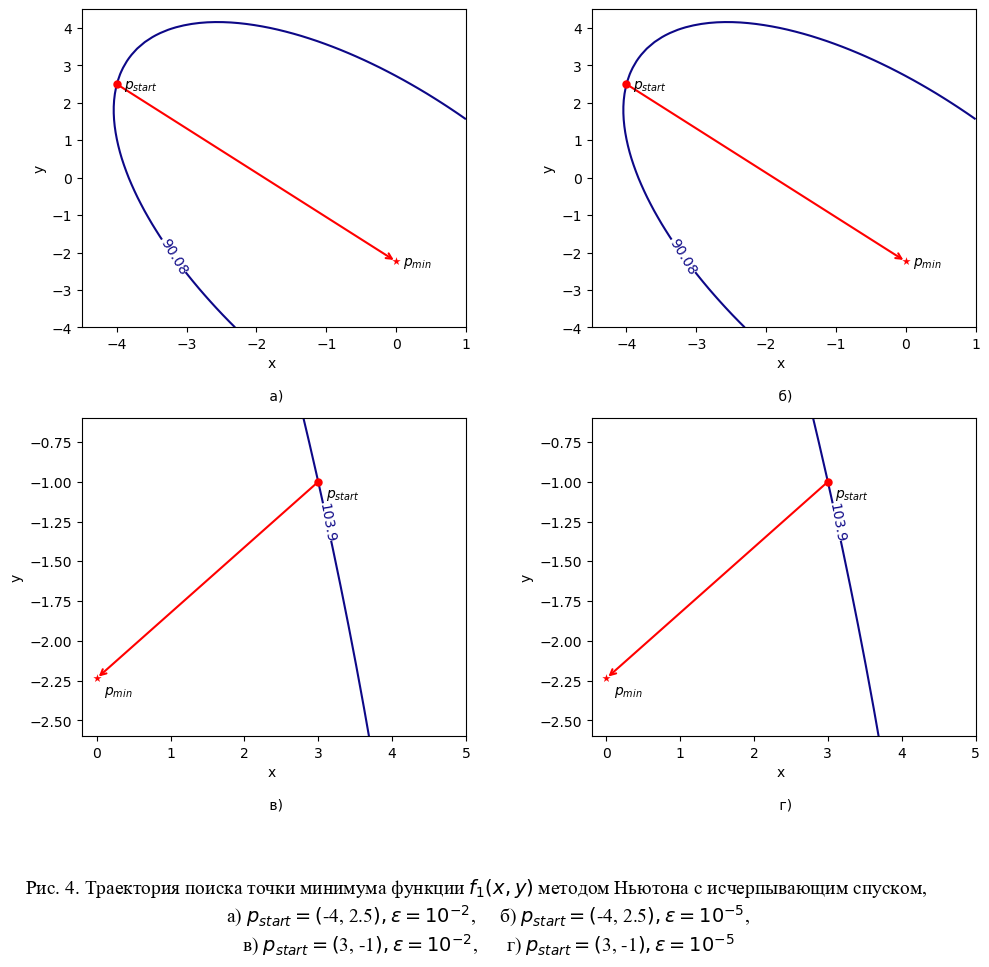

In [40]:
ExperimentPlot(func = f1, xmin1=-4.5, xmax1=1, ymin1=-4, ymax1=4.5,
                   xmin2=-0.2, xmax2=5, ymin2=-2.6, ymax2=-0.6, n1=1, n2=1, n3=1, n4=1,
                   xs1=xs1m_f1, ys1=ys1m_f1, xs2=xs2m_f1, ys2=ys2m_f1, 
                   xs3=xs3m_f1, ys3=ys3m_f1, xs4=xs4m_f1, ys4=ys4m_f1, 
                    ind = 4, xstart1=-4, ystart1=2.5, xstart2=3, ystart2=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 1, eps1 = 2, eps2 = 5, method = ' с исчерпывающим спуском')


In [41]:
xmin1m_f21, ymin1m_f21, fmin1m_f21, xs1m_f21, ys1m_f21, its1m_f21, fls1m_f21, grs1m_f21 = InfoModifiedNewtonMinSearch(f21, 
                                                                                              grad_xf21, grad_yf21, HesseF21, 
                                                                                              -5, 2, eps1)

In [42]:
xmin2m_f21, ymin2m_f21, fmin2m_f21, xs2m_f21, ys2m_f21, its2m_f21, fls2m_f21, grs2m_f21 = InfoModifiedNewtonMinSearch(f21, 
                                                                                              grad_xf21, grad_yf21, HesseF21, 
                                                                                              -5, 2, eps2)

In [43]:
xmin3m_f21, ymin3m_f21, fmin3m_f21, xs3m_f21, ys3m_f21, its3m_f21, fls3m_f21, grs3m_f21 = InfoModifiedNewtonMinSearch(f21, 
                                                                                              grad_xf21, grad_yf21, HesseF21, 
                                                                                              10, 10, eps1)

In [44]:
xmin4m_f21, ymin4m_f21, fmin4m_f21, xs4m_f21, ys4m_f21, its4m_f21, fls4m_f21, grs4m_f21 = InfoModifiedNewtonMinSearch(f21, 
                                                                                              grad_xf21, grad_yf21, HesseF21, 
                                                                                              10, 10, eps2)

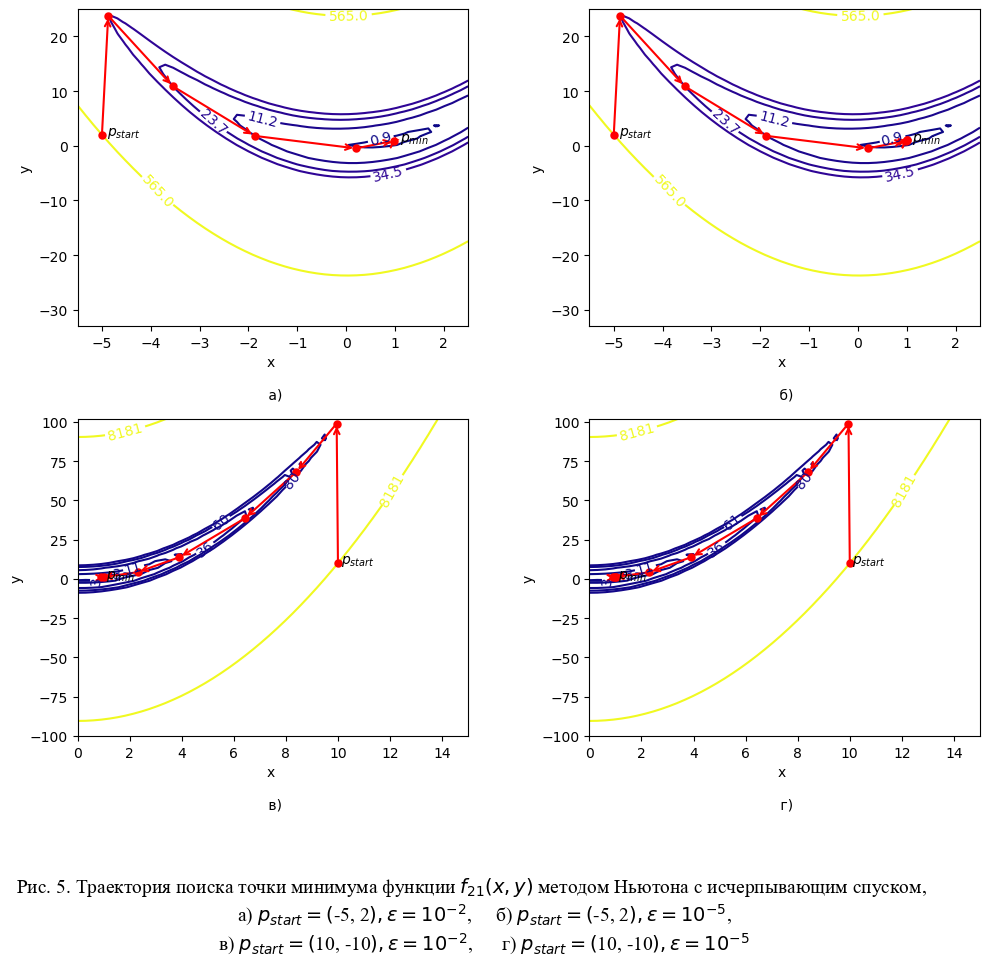

In [45]:
ExperimentPlot(func = f21, xmin1=-5.5, xmax1=2.5, ymin1=-33, ymax1=25,
                   xmin2=0, xmax2=15, ymin2=-100, ymax2=102, n1=its1m_f21, n2=its2m_f21, n3=its3m_f21, n4=its4m_f21,
                   xs1=xs1m_f21, ys1=ys1m_f21, xs2=xs2m_f21, ys2=ys2m_f21, 
                   xs3=xs3m_f21, ys3=ys3m_f21, xs4=xs4m_f21, ys4=ys4m_f21, 
                    ind = 5, xstart1=-5, ystart1=2, xstart2=10, ystart2=-10,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps1 = 2, eps2 = 5, method = ' с исчерпывающим спуском')


In [46]:
xmin1m_f22, ymin1m_f22, fmin1m_f22, xs1m_f22, ys1m_f22, its1m_f22, fls1m_f22, grs1m_f22 = InfoModifiedNewtonMinSearch(f22, 
                                                                                              grad_xf22, grad_yf22, HesseF22, 
                                                                                              -5, 2, eps1)

In [47]:
xmin2m_f22, ymin2m_f22, fmin2m_f22, xs2m_f22, ys2m_f22, its2m_f22, fls2m_f22, grs2m_f22 = InfoModifiedNewtonMinSearch(f22, 
                                                                                              grad_xf22, grad_yf22, HesseF22, 
                                                                                              -5, 2, eps2)

In [48]:
xmin3m_f22, ymin3m_f22, fmin3m_f22, xs3m_f22, ys3m_f22, its3m_f22, fls3m_f22, grs3m_f22 = InfoModifiedNewtonMinSearch(f22, 
                                                                                              grad_xf22, grad_yf22, HesseF22, 
                                                                                              10, 10, eps1)

In [49]:
xmin4m_f22, ymin4m_f22, fmin4m_f22, xs4m_f22, ys4m_f22, its4m_f22, fls4m_f22, grs4m_f22 = InfoModifiedNewtonMinSearch(f22, 
                                                                                              grad_xf22, grad_yf22, HesseF22, 
                                                                                              10, 10, eps2)

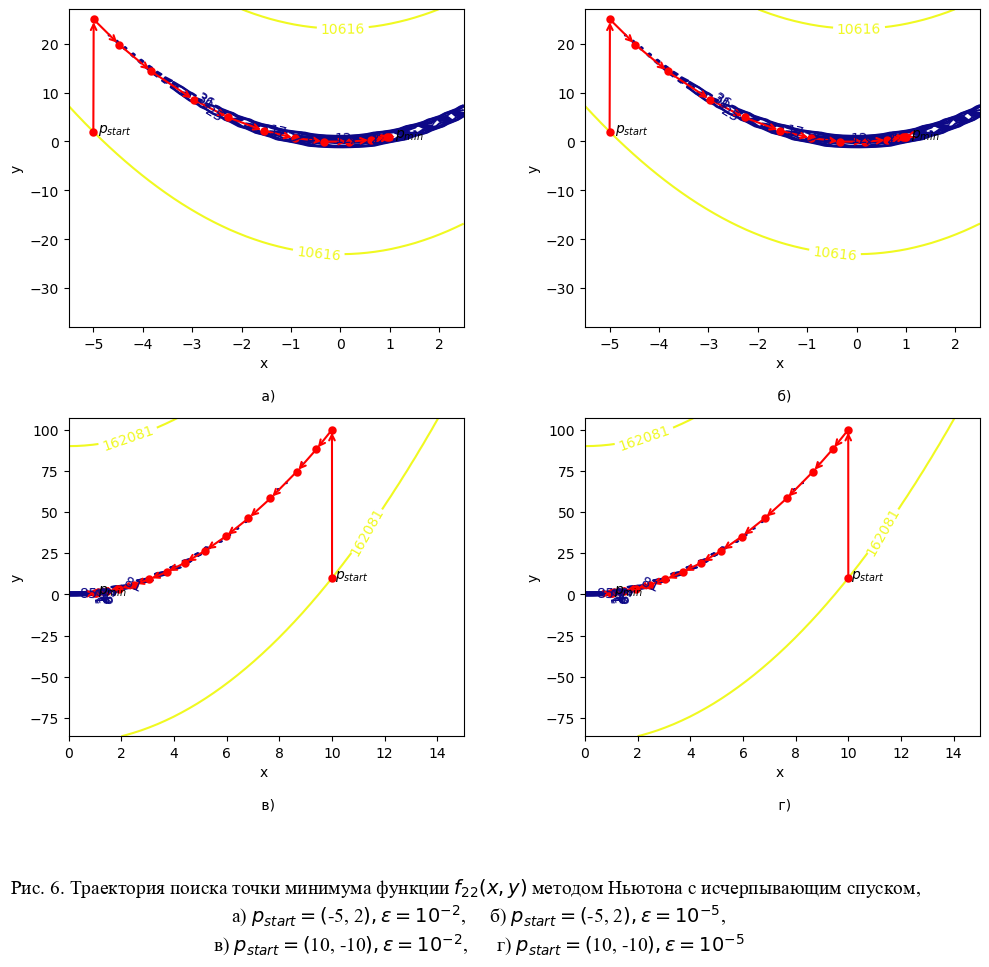

In [50]:
ExperimentPlot(func = f22, xmin1=-5.5, xmax1=2.5, ymin1=-38, ymax1=27,
                   xmin2=0, xmax2=15, ymin2=-86, ymax2=107, n1=its1m_f22, n2=its2m_f22, n3=its3m_f22, n4=its4m_f22,
                   xs1=xs1m_f22, ys1=ys1m_f22, xs2=xs2m_f22, ys2=ys2m_f22, 
                   xs3=xs3m_f22, ys3=ys3m_f22, xs4=xs4m_f22, ys4=ys4m_f22, 
                    ind = 6, xstart1=-5, ystart1=2, xstart2=10, ystart2=-10,
                    xspacing=0.1, yspacing=0.1, fnum = 22, eps1 = 2, eps2 = 5, method = ' с исчерпывающим спуском')


In [51]:
its2 = [its1m_f1, its2m_f1, its3m_f1, its4m_f1, its1m_f21, its2m_f21, its3m_f21, its4m_f21, its1m_f22, its2m_f22, its3m_f22, 
        its4m_f22]
fls2 = [fls1m_f1, fls2m_f1, fls3m_f1, fls4m_f1, fls1m_f21, fls2m_f21, fls3m_f21, 
        fls4m_f21, fls1m_f22, fls2m_f22, fls3m_f22, fls4m_f22]
grs2 = [grs1m_f1, grs2m_f1, grs3m_f1, grs4m_f1, grs1m_f21, grs2m_f21, grs3m_f21, 
        grs4m_f21, grs1m_f22, grs2m_f22, grs3m_f22, grs4m_f22]
xmins2 = [xmin1m_f1, xmin2m_f1, xmin3m_f1, xmin4m_f1, 
          xmin1m_f21, xmin2m_f21, xmin3m_f21, xmin4m_f21, 
          xmin1m_f22, xmin2m_f22, xmin3m_f22, xmin4m_f22]
ymins2 = [ymin1m_f1, ymin2m_f1, ymin3m_f1, ymin4m_f1, 
          ymin1m_f21, ymin2m_f21, ymin3m_f21, ymin4m_f21, 
          ymin1m_f22, ymin2m_f22, ymin3m_f22, ymin4m_f22]
fmins2 = [fmin1m_f1, fmin2m_f1, fmin3m_f1, fmin4m_f1, 
          fmin1m_f21, fmin2m_f21, fmin3m_f21, fmin4m_f21, 
          fmin1m_f22, fmin2m_f22, fmin3m_f22, fmin4m_f22]
funcs = ['f1(x, y)','f1(x, y)','f1(x, y)','f1(x, y)',
         'f21(x, y)', 'f21(x, y)','f21(x, y)', 'f21(x, y)',
         'f22(x, y)','f22(x, y)', 'f22(x, y)','f22(x, y)']
prec = [format(el, '0.1e') for el in [eps1, eps2]]
df2 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1],prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', '(-5, 2)', '(-5, 2)', 
                                        '(10, 10)', '(10, 10)', '(-5, 2)', '(-5, 2)', '(10, 10)', '(10, 10)'],
                    "Кол-во итераций": [elem for elem in its2], 
                    "Кол-во вычисленных градиентов": [elem for elem in grs2],
                    "Кол-во вычисленных матриц Гессе": [elem for elem in fls2],
                    "Точка минимума": [f'({xmins2[0]: 0.2f}, {ymins2[0]: 0.2f})',
                                     f'({xmins2[1]: 0.5f}, {ymins2[1]: 0.5f})',
                                     f'({xmins2[2]: 0.2f}, {ymins2[2]: 0.2f})',
                                     f'({xmins2[3]: 0.5f}, {ymins2[3]: 0.5f})',
                                     f'({xmins2[4]: 0.2f}, {ymins2[4]: 0.2f})',
                                     f'({xmins2[5]: 0.5f}, {ymins2[5]: 0.5f})',
                                     f'({xmins2[6]: 0.2f}, {ymins2[6]: 0.2f})',
                                     f'({xmins2[7]: 0.5f}, {ymins2[7]: 0.5f})',
                                     f'({xmins2[8]: 0.2f}, {ymins2[8]: 0.2f})',
                                     f'({xmins2[9]: 0.5f}, {ymins2[9]: 0.5f})',
                                     f'({xmins2[10]: 0.2f}, {ymins2[10]: 0.2f})',
                                     f'({xmins2[11]: 0.5f}, {ymins2[11]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins2[0]: 0.2f}',
                                                f'{fmins2[1]: 0.5f}',
                                                f'{fmins2[2]: 0.2f}',
                                                f'{fmins2[3]: 0.5f}',
                                                f'{fmins2[4]: 0.2f}',
                                                f'{fmins2[5]: 0.5f}',
                                                f'{fmins2[6]: 0.2f}',
                                                f'{fmins2[7]: 0.5f}',
                                                f'{fmins2[8]: 0.2f}',
                                                f'{fmins2[9]: 0.5f}',
                                                f'{fmins2[10]: 0.2f}',
                                                f'{fmins2[11]: 0.5f}']
                   })

s1 = df2.style.hide(axis="index").set_caption("Табл. 2. Результаты поиска минимумов функций методом Ньютона с исчерпывающим спуском")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s1.set_table_styles([cell_hover, headers])
s1.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s1.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s1

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных градиентов,Кол-во вычисленных матриц Гессе,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",1,2,2,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",1,2,2,"( 0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",1,2,2,"(-0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",1,2,2,"(-0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-5, 2)",6,7,7,"( 1.00, 1.00)",0.00
"f21(x, y)",1.0e-05,"(-5, 2)",8,9,9,"( 1.00000, 1.00000)",0.00000
"f21(x, y)",1.0e-02,"(10, 10)",8,9,9,"( 1.00, 1.00)",0.00
"f21(x, y)",1.0e-05,"(10, 10)",9,10,10,"( 1.00000, 1.00000)",0.00000
"f22(x, y)",1.0e-02,"(-5, 2)",13,14,14,"( 1.00, 1.00)",0.00
"f22(x, y)",1.0e-05,"(-5, 2)",14,15,15,"( 1.00000, 1.00000)",0.00000


In [52]:
df3 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1],prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', '(-5, 2)', '(-5, 2)', 
                                        '(10, 10)', '(10, 10)', '(-5, 2)', '(-5, 2)', '(10, 10)', '(10, 10)'],
                    "Итерации, без модификаций": [elem for elem in its1],
                    "Итерации, с модификацией": [elem for elem in its2],
                    "Градиенты, без модификаций": [elem for elem in grs1],
                    "Градиенты, с модификацией": [elem for elem in grs2],
                     "Гессе, без модификаций": [elem for elem in fls1],
                    "Гессе, с модификацией": [elem for elem in fls2],
                    
                   })
s2 = df3.style.hide(axis="index").set_caption("Табл. 3. Сравнение методов Ньютона с модификацией и без")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s2.set_table_styles([cell_hover, headers])
s2.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s2.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s2

Функция,Точность,Начальная точка,"Итерации, без модификаций","Итерации, с модификацией","Градиенты, без модификаций","Градиенты, с модификацией","Гессе, без модификаций","Гессе, с модификацией"
"f1(x, y)",1.0e-02,"(-4, 2.5)",1,1,2,2,2,2
"f1(x, y)",1.0e-05,"(-4, 2.5)",1,1,2,2,2,2
"f1(x, y)",1.0e-02,"(3, -1)",1,1,2,2,2,2
"f1(x, y)",1.0e-05,"(3, -1)",1,1,2,2,2,2
"f21(x, y)",1.0e-02,"(-5, 2)",5,6,6,7,6,7
"f21(x, y)",1.0e-05,"(-5, 2)",5,8,6,9,6,9
"f21(x, y)",1.0e-02,"(10, 10)",4,8,5,9,5,9
"f21(x, y)",1.0e-05,"(10, 10)",5,9,6,10,6,10
"f22(x, y)",1.0e-02,"(-5, 2)",4,13,5,14,5,14
"f22(x, y)",1.0e-05,"(-5, 2)",5,14,6,15,6,15


# Выводы и анализ

В ходе выполненных численных экспериментов были сделаны следующие выводы.

Во-первых, для квадратичной фукнции точка минимума находится за одну итерацию.

Во-вторых, по сравнению с ранее изученными методами (например, градиентными спусками) метод Ньютона требует значительно меньших вычислений градиентов и значений целевой функции даже для функции Розенброка.

Из минусов метода Ньютона без модификации можно отметить: требование существования первой и второй производных для целевой функции, а также чувствительность метода к выбору начальной точки (выбор начального приближения влияет на сходимость).

Сравнивая методы Ньютона с модификацией и без, можно сделать вывод, что метод с исчерпывающим требует большего числа итераций и количества вычисленных градиентов (примерно в три раза для данных экспериментов). Однако метод Ньютона с исчерпывающим спуском менее чувствителен к начальному приближению: последовательность приближений в экспериментах является релаксационной.

In [53]:
Txmin1_f1, Tymin1_f1, Tmin1_f1, Txs1_f1, Tys1_f1, Tits1_f1, Tfls1_f1, Tgrs1_f1 = InfoNewtonMinSearch(f21, 
                                                                                              grad_xf21, grad_yf21, HesseF21, 
                                                                                              4, 25000, eps2)

ss -99806 -16 -16 2
ss 1284880761099.6753 -1603047.5732801417 -1603047.5732801417 2
ss 1284880761083.6753 -1603047.5732701607 -1603047.5732701607 2
ss 1284880761067.6753 -1603047.5732601797 -1603047.5732601797 2
ss 1284880761051.6753 -1603047.5732501987 -1603047.5732501987 2
ss 1284880761035.6753 -1603047.5732402178 -1603047.5732402178 2
ss 1284880761019.6753 -1603047.5732302368 -1603047.5732302368 2
ss 1284880761003.6758 -1603047.5732202558 -1603047.5732202558 2
ss 1284880760995.6758 -1603047.5732152653 -1603047.5732152653 2
ss 1284880760987.6758 -1603047.5732102748 -1603047.5732102748 2
ss 1284880760979.6758 -1603047.5732052843 -1603047.5732052843 2
ss 1284880760971.6758 -1603047.5732002938 -1603047.5732002938 2
ss 1284880760963.6758 -1603047.5731953033 -1603047.5731953033 2
ss 1284880760955.6758 -1603047.5731903128 -1603047.5731903128 2
ss 1284880760947.6758 -1603047.5731853223 -1603047.5731853223 2
ss 1284880760939.6758 -1603047.5731803318 -1603047.5731803318 2
ss 1284880760931.675

In [54]:
print(Txmin1_f1, Tymin1_f1, Tmin1_f1)
print(Tits1_f1)

400761.89319901593 160610095040.95947 160609293517.9231
100


In [55]:
T2xmin1_f1, T2ymin1_f1, T2min1_f1, T2xs1_f1, T2ys1_f1, T2its1_f1, T2fls1_f1, T2grs1_f1 = InfoModifiedNewtonMinSearch(f21, 
                                                                                              grad_xf21, grad_yf21, HesseF21, 
                                                                                              4, 25000, eps2)

In [56]:
print(T2xmin1_f1, T2ymin1_f1, T2min1_f1)

1.000000000030705 1.0000000000674354 9.791021369287721e-22


In [57]:
def TestPlot(func, xmin1, xmax1, ymin1, ymax1, xs1, xs2, ys1, ys2, n1, n2, ind, eps=5, fnum = 21, xstart1 =4, ystart1 = 25000):
    x1 = np.linspace(xmin1, xmax1)
    y1 = np.linspace(ymin1, ymax1)
    X1, Y1 = np.meshgrid(x1, y1)
    Z1 = func(X1, Y1)
    xspacing = 0.1
    yspacing = 0.2
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 10))
    levels1 = []
    levels2 = []
    
    ax[0].scatter(xs1[0:n1], ys1[0:n1], color='red', lw=0.05, zorder=2)
    ax[0].scatter(xs1[-1], ys1[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[1].scatter(xs2[0:n2], ys2[0:n2], color='red', lw=0.05, zorder=2)
    ax[1].scatter(xs2[-1], ys2[-1], color='red', lw=0.05, marker='*', zorder=2)
    
    #1 plot
    for i in range(0, n1):
        levels1.append(func(xs1[i], ys1[i]))
        ax[0].annotate('', xytext=(xs1[i], ys1[i]), xy=(xs1[i+1], ys1[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels1.sort()
    CS1 = ax[0].contour(X1, Y1, Z1, cmap=cm.plasma, levels=levels1, zorder=1)
    ax[0].clabel(CS1, CS1.levels,inline=True,inline_spacing = 1)
    #2 plot
    for i in range(0,n2):
        levels2.append(func(xs2[i], ys2[i]))
        ax[1].annotate('', xytext=(xs2[i], ys2[i]), xy=(xs2[i+1], ys2[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels2.sort()
    CS2 = ax[1].contour(X1, Y1, Z1, cmap=cm.plasma, levels=levels2, zorder=1)
    ax[1].clabel(CS2, CS2.levels,inline=True,inline_spacing = 1)
   
    
    
    ax[0].annotate('$p_{min}$', xytext=(xs1[-1]+xspacing, ys1[-1]-yspacing), xy=(xs1[-1], ys1[-1]))
    ax[0].annotate('$p_{start}$', xytext=(xs1[0]+xspacing, ys1[0]-yspacing), xy=(xs1[0], ys1[0]))
    ax[0].set_xlabel('x \n \n a)')
    
    ax[1].annotate('$p_{min}$', xytext=(xs2[-1]+xspacing, ys2[-1]-yspacing), xy=(xs2[-1], ys2[-1]))
    ax[1].annotate('$p_{start}$', xytext=(xs2[0]+xspacing, ys2[0]-yspacing), xy=(xs2[0], ys2[0]))
    ax[1].set_xlabel('x \n \n б)')
    
    
    plt.title(f'Рис. {ind}.'+' Траектория поиска точки минимума функции $f_{'+f'{fnum}'+'}(x, y)$ методом Ньютона'+', \n \
    а) $p_{start}=($'+f'{xstart1}, {ystart1}'+'$),$' + '$ ε=10^{'+f'{-eps}'+'}$, \
    б) $p_{start}=($'+f'{xstart1}, {ystart1}'+'$),$' + '$ ε=10^{'+f'{-eps}'+'}$',
                 fontsize=14, fontname='Times New Roman',y=-0.7, x = -0.3)
    plt.tight_layout()
    #plt.subplots_adjust( wspace=0.3)
    plt.show()

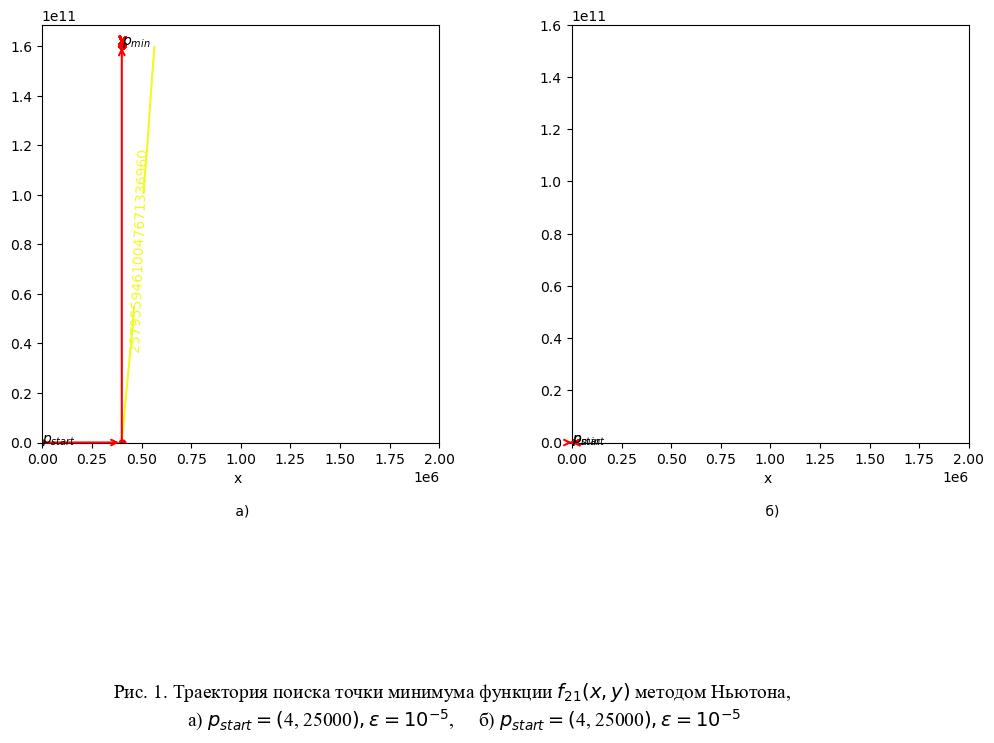

In [58]:
TestPlot(f21, xmin1 = -2000, xmax1=2000000, 
         ymin1=0, ymax1=1.6e11, xs1=Txs1_f1, xs2=T2xs1_f1, ys1=Tys1_f1, ys2=T2ys1_f1, 
         n1 = 99, n2 = 5, ind = 1, eps=5, fnum = 21, xstart1 =4, ystart1 = 25000)

Почему в классическом методе Ньютона последовательность приближений к минимуму не всегда является релаксационной?

Основой метода Ньютона является локальное представление дважды дифференцируемой целевой функции квадратичной функцией. 

В окрестности точки $x^{k-1}$ представим целевую функцию в виде ряда Тейлора с остаточным членом в форме Пеано:
$$
f(x) = f(x^{k-1}) + (\text{grad}f(x^{k-1}), x-x^{k-1}) + \dfrac12(H(x^{k-1})(x-x^{k-1}),x-x^{k-1}) + o(|x-x^{k-1}|^2).
$$

Пренебрегая последним слагаемым в правой части, получем квадратичную функцию:
$$
\varphi(x) = f(x^{k-1}) + (\text{grad}f(x^{k-1}), x-x^{k-1}) + \dfrac12(H(x^{k-1})(x-x^{k-1}),x-x^{k-1}).
$$

Однако в последоватльности приближений могут появляться точки $x^k$, в окрестности которых минимум $x^{min}_{\varphi}$ параболоида приближения (функции $\varphi(x)$) для $f(x)$ есть большее значение, чем в точке $x^k$, т.е.:

$$
\varphi(x) > \varphi(x^{min}_{\varphi}), \text{ но  } f(x_k) < f(x^{min}_{\varphi}),
$$
и релаксационность последовательности нарушается.

Проиллюстрируем это на примере последовательности приближений, показанной на рис. 2 а). На нём показан поиск минимума функции Розенброка с параметром $\alpha = 1$, начальной точкой $x^0 = (-5, 2)$. Обратим внимание на переход от точки $x^1 = (-4.87, 23.72)$ в точку $x^2 = (0.81, -31.68)$.

В точке $x^1$ матрица Гессе целевой функции:
$$
H(x^1) = \left(\begin{array}{cc} 
191.983 & 19.4894\\
19.4894 & 2
\end{array}\right)
$$

Квадратичная функция приближения:
$$
\varphi(x) = 95.9914 x^2+x (19.4894 y+460.989)+y^2+47.4794 y+565.347.
$$

$x^2 = (0.81, -31.68)$ является минимумом $\varphi(x)$,  $\varphi(x^2) = 1.09074$, однако $f_{21}(x^2) = 1045.66$.

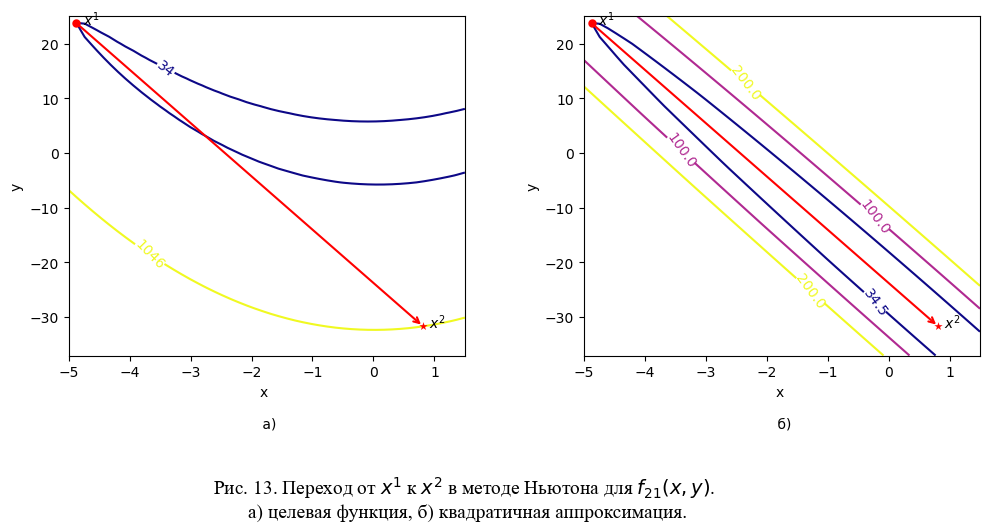

In [59]:
def varphi(x, y):
    return 95.9914*x**2+x*(19.4894*y+460.989)+y**2+47.4794*y+565.347
x1 = np.linspace(-5, 1.5)
y1 = np.linspace(-37, 25)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = f21(X1, Y1)
Z2 = np.vectorize(varphi)(X1, Y1)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 6))
levels1 = [1045.66]
levels2 = [100, 200]
xs1 = [-4.872340425531915, 0.8146389694701801]
ys1 = [23.72340425531915, -31.67809798859896]
xs2 = [-4.872340425531915, 0.8146389694701801]
ys2 =  [23.72340425531915, -31.67809798859896]
n1 = 1
n2 = 1
ax[0].scatter(xs1[0:n1], ys1[0:n1], color='red', lw=0.05, zorder=2)
ax[0].scatter(xs1[-1], ys1[-1], color='red', lw=0.05, marker='*', zorder=2)
ax[1].scatter(xs2[0:n2], ys2[0:n2], color='red', lw=0.05, zorder=2)
ax[1].scatter(xs2[-1], ys2[-1], color='red', lw=0.05, marker='*', zorder=2)
    #1 plot
for i in range(0, n1):
    levels1.append(f21(xs1[i], ys1[i]))
    ax[0].annotate('', xytext=(xs1[i], ys1[i]), xy=(xs1[i+1], ys1[i+1]),
                      arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
levels1.sort()
CS1 = ax[0].contour(X1, Y1, Z1, cmap=cm.plasma, levels=levels1, zorder=1)
ax[0].clabel(CS1, CS1.levels,inline=True,inline_spacing = 1)
    #2 plot
for i in range(0,n2):
    levels2.append(varphi(xs2[i], ys2[i]))
    ax[1].annotate('', xytext=(xs2[i], ys2[i]), xy=(xs2[i+1], ys2[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
levels2.sort()
CS2 = ax[1].contour(X1, Y1, Z2, cmap=cm.plasma, levels=levels2, zorder=1)
ax[1].clabel(CS2, CS2.levels,inline=True,inline_spacing = 1)
   
yspacing = 0.3
xspacing = 0.1

ax[0].annotate('$x^2$', xytext=(xs1[-1]+xspacing, ys1[-1]-yspacing), xy=(xs1[-1], ys1[-1]))
ax[0].annotate('$x^1$', xytext=(xs1[0]+xspacing, ys1[0]-yspacing), xy=(xs1[0], ys1[0]))
ax[1].annotate('$x^2$', xytext=(xs2[-1]+xspacing, ys1[-1]-yspacing), xy=(xs1[-1], ys1[-1]))
ax[1].annotate('$x^1$', xytext=(xs2[0]+xspacing, ys1[0]-yspacing), xy=(xs1[0], ys1[0]))

ax[0].set_xlabel('x \n \n a)')
ax[1].set_xlabel('x \n \n б)')    
ax[0].set_ylabel('y')
ax[1].set_ylabel('y')
ind = 13
plt.title(f'Рис. {ind}.'+' Переход от $x^1$ к $x^2$ в методе Ньютона для $f_{'+f'{21}'+'}(x, y)$. \n а) целевая функция, б) квадратичная аппроксимация.',
fontsize=14, fontname='Times New Roman',y=-0.5, x = -0.3)
plt.tight_layout()
plt.subplots_adjust( wspace=0.3)
plt.show()